In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("spam.csv",encoding="latin-1")
df = df[['v1', 'v2']] 
df.columns=['label','message']

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
import re
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [43]:
nltk.download('stopwords')
sn=SnowballStemmer("english")
stop=set(stopwords.words('english'))
nltk.download('all')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkarshsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/utkarshsingh/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/utkarshsingh/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/utkarshsingh/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/utkarshsingh/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    | 

True

In [54]:
def clean_text(sms):
    sms=sms.lower()
    sms=re.sub("[^a-z 0-9]",' ',sms)
    sms=nltk.word_tokenize(sms)
    sms=[t for t in sms if len(t)>1]
    sms=[sn.stem(word) for word in sms if word not in stop]
    sms=' '.join(sms)
    return sms

In [55]:
clean_text("Get is... are... playing Unlimited <!!!>,,,??? data free data play 100GB... at Rs.0")

'get play unlimit data free data play 100gb rs'

In [58]:
df['clean_message']=df['message'].apply(clean_text)

In [60]:
df.head()

,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


Wordcloud

In [61]:
!pip install wordcloud

In [62]:
from wordcloud import WordCloud

In [69]:
hamdata=df[df['label']=='ham']
hamdata=hamdata['clean_message']

In [75]:
def wordCloud(data):
    words=' '.join(data)
    wc=WordCloud(background_color='white')
    wc=wc.generate(words)
    plt.Figure(figsize=(10,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.imshow(wc)

ham data words : 


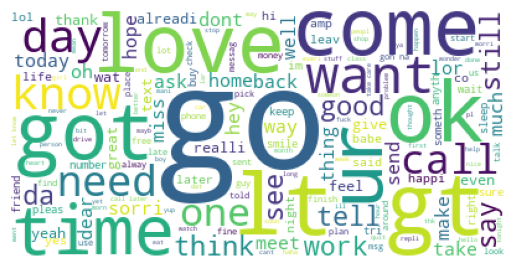

In [78]:
print("ham data words : ")

wordCloud(hamdata)

In [80]:
spamdata=df[df['label']=='spam']
spamdata=spamdata['clean_message']

spam data words


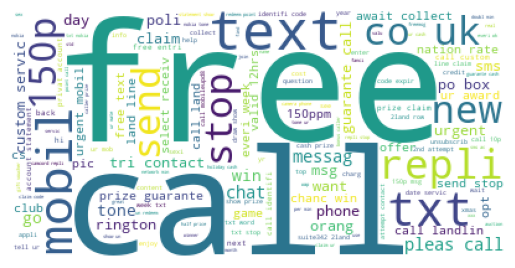

In [81]:
print("spam data words")

wordCloud(spamdata)

featurisation

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(df['clean_message']).toarray()


In [85]:
X.shape

(5572, 5000)

In [91]:
y=pd.get_dummies(df['label'],dtype='int')
y=y['spam'].values

Model Building

In [93]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
from sklearn.naive_bayes import MultinomialNB

In [97]:
model=MultinomialNB()

In [98]:
model.fit(X_train,y_train)

MultinomialNB()

In [99]:
y_pred=model.predict(X_test)

In [102]:
pd.DataFrame({'Actual': y_test,'Predicted':y_pred}).head(10)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


Evaluation

In [103]:
print("Accuracy on the training data")


model.score(X_train,y_train)

Accuracy on the training data


0.9916984518734575

In [104]:
print("Accuracy on the training data")

model.score(X_test,y_test)

Accuracy on the training data


0.9856502242152466

In [105]:
from sklearn.metrics import confusion_matrix, f1_score,classification_report

In [106]:
confusion_matrix(y_test,y_pred)

array([[942,   7],
       [  9, 157]])

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.96      0.95      0.95       166

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [108]:
f1_score(y_test,y_pred)

0.9515151515151515